In [1]:
# TABLE 1 CLEAN UP

In [1]:
import os
import csv
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook                 

In [2]:
#Open reosurces file
table1_path = os.path.join("Resources", "Raw Data", "Table 1 - US-oilexports.csv")

In [3]:
# Read csv
table1_data = pd.read_csv(table1_path, header=0, skiprows=2)

# Extract column of interest
table1_df = pd.DataFrame(table1_data, columns= ['Date','U.S. Exports of Crude Oil (Thousand Barrels)'])
table1_df.head(10)

,Date,U.S. Exports of Crude Oil (Thousand Barrels)
0,Jan-1920,469.0
1,Feb-1920,853.0
2,Mar-1920,892.0
3,Apr-1920,693.0
4,May-1920,761.0
5,Jun-1920,627.0
6,Jul-1920,723.0
7,Aug-1920,553.0
8,Sep-1920,790.0
9,Oct-1920,777.0


In [4]:
date = table1_df["Date"]
crude_export = table1_df["U.S. Exports of Crude Oil (Thousand Barrels)"]

# Since date is in MMM-YYYY format, convert to dtype Datetime64[ns]
date_64ns = pd.to_datetime(table1_df["Date"])


In [5]:
# Get rid of the minutes and seconds
formated_date_list = []

for item in date_64ns:
    date_clean = str(item)[:10]
    formated_date_list.append(date_clean)


In [6]:
# Create new data, Date is in datetime type
table1_df_clean =  pd.DataFrame({
                        "Date": formated_date_list,
                        "U.S. Exports of Crude Oil (Thousand Barrels)": crude_export
                       })



#Drop NaN rows
table1_df_clean.dropna(inplace=True) 
table1_df_clean.head()

,Date,U.S. Exports of Crude Oil (Thousand Barrels)
0,1920-01-01,469.0
1,1920-02-01,853.0
2,1920-03-01,892.0
3,1920-04-01,693.0
4,1920-05-01,761.0


In [7]:
# Convert date to datetime dtype and format YY-MM-DD
table1_df_clean['Date_dt'] = pd.to_datetime(table1_df_clean['Date'], format='%Y-%m-%d')

In [8]:
#Set start date
sdate = dt.datetime(2005,1,1)   # start date
edate = dt.datetime(2019,12,30)   # end date

table1_range = table1_df_clean[(table1_df_clean['Date_dt']>=sdate ) & (table1_df_clean['Date_dt']<= edate)]
table1_clean = table1_range[["Date_dt", "U.S. Exports of Crude Oil (Thousand Barrels)"]]
table1_final = table1_clean.rename(columns={ "Date_dt" : "Date"})
table1_final

,Date,U.S. Exports of Crude Oil (Thousand Barrels)
1020,2005-01-01,1239.0
1021,2005-02-01,541.0
1022,2005-03-01,1111.0
1023,2005-04-01,1345.0
1024,2005-05-01,1694.0
...,...,...
1188,2019-01-01,79830.0
1189,2019-02-01,83721.0
1190,2019-03-01,83196.0
1191,2019-04-01,85276.0


In [9]:
# Export leaned table 1 to csv
table1_final.to_csv("Resources/Clean Data/Table 1 - Clean.csv", index=False)                

In [10]:
# This analysis only includes Crude Oil and exclude NG exports

In [11]:
# -------------------------------------------------------------------------------------------------------------------
# TABLE 3 CLEAN UP

In [12]:
#Open reosurces file
table3_path = os.path.join("Resources", "Raw Data", "Table 3 - US-dollar-index-historical-chart.csv")

In [13]:
# Read csv
table3_data = pd.read_csv(table3_path, header=0, skiprows=15)

# Extract column of interest
table3_df = pd.DataFrame(table3_data).reset_index(drop=True)

In [14]:
# Convert date to datetime dtype and format YY-MM-DD
table3_df['Date_dt'] = pd.to_datetime(table3_df['date'], format='%Y-%m-%d')

In [15]:
#Set start date
sdate = dt.datetime(2005,1,1)   # start date
edate = dt.datetime(2019,12,30)   # end date

table3_range = table3_df[(table3_df['Date_dt']>=sdate ) & (table3_df['Date_dt']<= edate)]


# Change header name
table3_clean = table3_range.rename(columns={ "Date_dt" : "Date", " value" : "US Dollars Index"})
table3_final = table3_clean[["Date", "US Dollars Index"]]
table3_final

,Date,US Dollars Index
384,2005-01-01,95.450
385,2005-02-01,95.698
386,2005-03-01,95.307
387,2005-04-01,96.234
388,2005-05-01,96.470
...,...,...
559,2019-08-01,102.809
560,2019-09-01,102.766
561,2019-10-01,102.203
562,2019-11-01,101.954


In [16]:
# Export leaned table 3 to csv
table3_final.to_csv("Resources/Clean Data/Table 3 - Clean.csv", index=False)                

In [17]:
# Merge with Table 1
merge_1_3 = pd.merge(table1_final, table3_final, on="Date", how="left")
merge_1_3

,Date,U.S. Exports of Crude Oil (Thousand Barrels),US Dollars Index
0,2005-01-01,1239.0,95.450
1,2005-02-01,541.0,95.698
2,2005-03-01,1111.0,95.307
3,2005-04-01,1345.0,96.234
4,2005-05-01,1694.0,96.470
...,...,...,...
168,2019-01-01,79830.0,100.401
169,2019-02-01,83721.0,100.403
170,2019-03-01,83196.0,100.772
171,2019-04-01,85276.0,100.746


In [18]:

# -------------------------------------------------------------------------------------------------------------------
# TABLE 7 CLEAN UP

In [19]:
#Open reosurces file
table7_path = os.path.join("Resources", "Raw Data", "Table 7 - US GDP Data By Q.csv")

In [20]:
# Read csv
table7_data = pd.read_csv(table7_path, header=0, skiprows=3)

# Extract column of interest
table7_df = pd.DataFrame(table7_data).reset_index(drop=True)
quarter_row = table7_df.iloc[:2]

table7_df.dropna(how = "any", inplace = True)
# # table7_clean = table7_df.loc[table7_df["Line", "Line,"        Oil and gas extraction"]]
table_filter = table7_df[table7_df.columns[1]].str.contains("Oil")
# table_filter_2 = table7_df.iloc[0]
new_table7_df = quarter_row.append(table7_df[table_filter])

# table7_df.set_index("Line", inplace=True)
new_table7_df

,"Last Revised on: September 30, 2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Line,NaN,2005,2005,2005,2005,2006,2006,2006,2006,...,2018,2018,2018,2018,2019,2019,2019,2019,2020,2020
1,Line,NaN,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,...,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2
8,7,Oil and gas extraction,133.5,143.7,160.6,186.3,181.2,179.5,180.7,174.2,...,201.5,212.7,226.2,218.8,198.1,199.5,186,188.8,138.8,49.7


In [21]:
# Transpose dataframe

new_table7_df.drop(columns=["Last Revised on: September 30, 2020", "Unnamed: 1"], inplace=True)


In [22]:
clean_table7_df = new_table7_df.T
clean_table7_df

,0,1,8
Unnamed: 2,2005,Q1,133.5
Unnamed: 3,2005,Q2,143.7
Unnamed: 4,2005,Q3,160.6
Unnamed: 5,2005,Q4,186.3
Unnamed: 6,2006,Q1,181.2
...,...,...,...
Unnamed: 59,2019,Q2,199.5
Unnamed: 60,2019,Q3,186
Unnamed: 61,2019,Q4,188.8
Unnamed: 62,2020,Q1,138.8


In [153]:
clean_table7_df["Date_1"] = clean_table7_df[0] + "-" + clean_table7_df[1]
clean_table7_df['Date'] = pd.to_datetime(clean_table7_df["Date_1"])
table7_final = clean_table7_df[["Date", 8]]
table7_final.columns = ["Date", "US GDP by Oil and Gas Extraction"]
table7_final.reset_index(drop = True, inplace = True)

table7_final_2 = table7_final[(table7_final['Date']>= '2005-01-01' ) & (table7_final['Date']<= '2019-12-30')]

table7_final_2.head()


,Date,US GDP by Oil and Gas Extraction
0,2005-01-01,133.5
1,2005-04-01,143.7
2,2005-07-01,160.6
3,2005-10-01,186.3
4,2006-01-01,181.2


In [24]:
# Export leaned table 7 to csv
table7_final_2.to_csv("Resources/Clean Data/Table 7 - Clean.csv", index=False)                

In [36]:
merge_final = pd.merge(merge_1_3, table7_final, on="Date", how="left")

In [60]:
merge_final['US GDP by Oil and Gas Extraction'] = merge_final['US GDP by Oil and Gas Extraction'].replace(np.nan, 0)
merge_final

,Date,U.S. Exports of Crude Oil (Thousand Barrels),US Dollars Index,US GDP by Oil and Gas Extraction
0,2005-01-01,1239.0,95.450,133.5
1,2005-02-01,541.0,95.698,0
2,2005-03-01,1111.0,95.307,0
3,2005-04-01,1345.0,96.234,143.7
4,2005-05-01,1694.0,96.470,0
...,...,...,...,...
168,2019-01-01,79830.0,100.401,198.1
169,2019-02-01,83721.0,100.403,0
170,2019-03-01,83196.0,100.772,0
171,2019-04-01,85276.0,100.746,199.5


In [92]:
merge_final["US GDP by Oil and Gas Extraction"] = merge_final["US GDP by Oil and Gas Extraction"].fillna(0)
merge_final["US GDP by Oil and Gas Extraction"].astype(float)

0      133.5
1        0.0
2        0.0
3      143.7
4        0.0
       ...  
168    198.1
169      0.0
170      0.0
171    199.5
172      0.0
Name: US GDP by Oil and Gas Extraction, Length: 173, dtype: float64

In [188]:
# Export leaned table 3 to csv
merge_final.to_csv("Resources/Plotting/Transformed Data/ Transformed Data - Part 1.csv", index=False) 

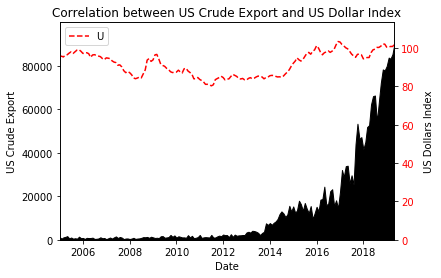

In [189]:
#-----------------------------------------------------------------------------------------------
# PLOTTING
x_axis = merge_final["Date"]
y_axis_1 = merge_final["U.S. Exports of Crude Oil (Thousand Barrels)"]
y_axis_2 = merge_final["US Dollars Index"]
y_axis_3 = merge_final["US GDP by Oil and Gas Extraction"]

# y_axis_1, y_axis_2 = ax.get_ylimit(y_axis_1,y_axis_2)
# ax_c.set_ylimit()

fix, ax1 = plt.subplots()

# 1st y axis

ax1.set_title("Correlation between US Crude Export and US Dollar Index")
ax1.set_xlabel('Date')
ax1.set_ylabel('US Crude Export')
ax1.stackplot(x_axis, y_axis_1, color="black")
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlim(min(x_axis), max(x_axis) )
ax1.set_ylim(0,max(y_axis_1) + 10000 )
    
# 2nd y axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("US Dollars Index")  # we already handled the x-label with ax1
ax2.plot(x_axis, y_axis_2, color='red', linestyle="dashed")
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, max(y_axis_2) + 10)
ax2.legend(labels="US Dollar Index", loc="best")

plt.savefig("Resources/Plotting/Plots/Part 1A.png")
plt.show()



In [190]:
# Still need to plot the USD GPD from Oil and Gas Extraction ####

In [191]:
merge_final_quarter = merge_final.loc[merge_final['US GDP by Oil and Gas Extraction'] != 0]
merge_final_quarter.head()

,Date,U.S. Exports of Crude Oil (Thousand Barrels),US Dollars Index,US GDP by Oil and Gas Extraction
0,2005-01-01,1239.0,95.450,133.5
3,2005-04-01,1345.0,96.234,143.7
6,2005-07-01,1058.0,97.987,160.6
9,2005-10-01,530.0,98.909,186.3
12,2006-01-01,849.0,97.124,181.2


In [192]:
merge_final_quarter['US GDP by Oil and Gas Extraction'] = merge_final_quarter['US GDP by Oil and Gas Extraction'].astype(float)
merge_final_quarter.dtypes

C:\Users\navyh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date                                            datetime64[ns]
U.S. Exports of Crude Oil (Thousand Barrels)           float64
US Dollars Index                                       float64
US GDP by Oil and Gas Extraction                       float64
dtype: object

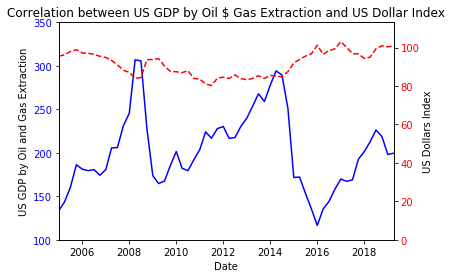

In [193]:
x_axis = merge_final_quarter["Date"]
y_axis_1 = merge_final_quarter["US GDP by Oil and Gas Extraction"]
y_axis_2 = merge_final_quarter["US Dollars Index"]

fix, ax1 = plt.subplots()

# 1st y axis

ax1.set_title("Correlation between US GDP by Oil $ Gas Extraction and US Dollar Index")
ax1.set_xlabel('Date')
ax1.set_ylabel('US GDP by Oil and Gas Extraction')
ax1.plot(x_axis, y_axis_1, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xlim(min(x_axis), max(x_axis) )
ax1.set_ylim(100,350)
    
# 2nd y axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("US Dollars Index")  # we already handled the x-label with ax1
ax2.plot(x_axis, y_axis_2, color='red', linestyle="dashed")
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, max(y_axis_2) + 10)

plt.savefig("Resources/Plotting/Plots/Part 1B.png")


plt.show()